<font size="+2" color="blue">Additional results: model purchased device</font>

# Practice Session 01+02: Data preparation

Author: <font color="blue">Nathaniel Ken A. Aquino</font>

E-mail: <font color="blue">nathanielken.aquino.cics@ust.edu.ph</font>

Date: <font color="blue">February 8, 2025</font>

# 1. Exploratory data analysis 

In [2]:
import pandas as pd
import seaborn as sns
import datetime

import numpy as np
from numpy import array
from numpy import argmax

import matplotlib.pyplot as plt
from matplotlib import pyplot

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
# LEAVE AS-IS

input_dataset = pd.read_csv("device_db.csv", sep=",")

## 1.1. Data types and simple statistics

In [4]:
input_dataset.head(5)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


In [5]:
column_names = []
for column in input_dataset.columns:
    column_names.append({"column_name": column, "column_type": input_dataset[column].dtype, 
                         "column_unique_values": input_dataset[column].nunique(), "column_size": input_dataset[column].size})

column_type_df = pd.DataFrame(column_names, columns=['column_name', 'column_type', 'column_unique_values', 'column_size']).reset_index()
display(column_type_df)

,index,column_name,column_type,column_unique_values,column_size
0,0,PURCHASED_DEVICE,object,101,10000
1,1,DEVICE_VALUE,float64,368,10000
2,2,LAST_DEVICE_CHANGE,float64,76,10000
3,3,DATA_TRAFFIC_MONTH_1,float64,7215,10000
4,4,DATA_TRAFFIC_MONTH_2,float64,7182,10000
5,5,DATA_TRAFFIC_MONTH_3,float64,7176,10000
6,6,DATA_TRAFFIC_MONTH_4,float64,7124,10000
7,7,DATA_TRAFFIC_MONTH_5,float64,7173,10000
8,8,DATA_TRAFFIC_MONTH_6,float64,7074,10000
9,9,VOICE_TRAFFIC_MONTH_1,float64,3550,10000


In [6]:
float64_stats = []

for column in input_dataset.columns:
    if input_dataset[column].dtype == 'float64':
        column_stats = {
            'column_name': column,
            'mean': np.nanmean(input_dataset[column]),
            'median': np.nanmedian(input_dataset[column]),
            'min': np.nanmin(input_dataset[column]),
            'max': np.nanmax(input_dataset[column])
        }
        float64_stats.append(column_stats)

float64_stats_df = pd.DataFrame(float64_stats, columns=['column_name', 'mean', 'median', 'min', 'max'])

pd.options.display.float_format = '{:.2f}'.format
display(float64_stats_df)


,column_name,mean,median,min,max
0,DEVICE_VALUE,750.48,393.00,15.00,9057.00
1,LAST_DEVICE_CHANGE,20166984.77,20170601.00,20121001.00,20190501.00
2,DATA_TRAFFIC_MONTH_1,3481.83,1208.73,0.00,127017.59
3,DATA_TRAFFIC_MONTH_2,3649.96,1294.95,0.00,111948.84
4,DATA_TRAFFIC_MONTH_3,3653.43,1310.67,0.00,111948.84
5,DATA_TRAFFIC_MONTH_4,3269.44,1176.54,0.00,87856.41
6,DATA_TRAFFIC_MONTH_5,3673.37,1287.09,0.00,121834.81
7,DATA_TRAFFIC_MONTH_6,3427.69,1277.12,0.00,90550.61
8,VOICE_TRAFFIC_MONTH_1,154.85,84.05,0.00,4220.10
9,VOICE_TRAFFIC_MONTH_2,142.57,74.90,0.00,3132.10


In [7]:
for column in input_dataset.columns:
    print(f"Column Name: ", column)
    print(input_dataset[column].describe())
    print("\n")

Column Name:  PURCHASED_DEVICE
count                                                  9853
unique                                                  101
top       TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...
freq                                                   5379
Name: PURCHASED_DEVICE, dtype: object


Column Name:  DEVICE_VALUE
count   9690.00
mean     750.48
std      979.71
min       15.00
25%      297.00
50%      393.00
75%      609.00
max     9057.00
Name: DEVICE_VALUE, dtype: float64


Column Name:  LAST_DEVICE_CHANGE
count       7682.00
mean    20166984.77
std        10925.77
min     20121001.00
25%     20160801.00
50%     20170601.00
75%     20171001.00
max     20190501.00
Name: LAST_DEVICE_CHANGE, dtype: float64


Column Name:  DATA_TRAFFIC_MONTH_1
count     8868.00
mean      3481.83
std       6364.54
min          0.00
25%         51.92
50%       1208.73
75%       4249.16
max     127017.59
Name: DATA_TRAFFIC_MONTH_1, dtype: float64


Column Name:  DATA_TRAFFIC_MONTH_2
co

> The stats that I manually computed have the same values for the same categories that both the manual and describe function has (Mean, Min, Max). However, the manual computation has less to categories compared to the describe function that has more unique categories to show being their count, standard deviation (std), 25%, 75, and descriptive names like their Name and datatype. On the other hand, while the describe function already has every current category that the manual computation has shown, it's advantage is that it is easily customizable as everything is done manually, unlike just using the describe function.

## 1.2. Inventory of device models

In [8]:
# Census of PREVIOUS_DEVICE_MODEL
previous_device_model_census = input_dataset['PREVIOUS_DEVICE_MODEL'].value_counts().reset_index()
previous_device_model_census.columns = ['PREVIOUS_DEVICE_MODEL', 'Frequency']
display(previous_device_model_census)

,PREVIOUS_DEVICE_MODEL,Frequency
0,iPhone 7,425
1,iPhone 6,250
2,Samsung Galaxy J5,243
3,iPhone 6S,212
4,Samsung Galaxy J1 Mini,204
...,...,...
575,LG Optimus L3 II,1
576,"Lenovo S930,Lenovo S939",1
577,Samsung Corby II,1
578,SGH-U600,1


In [9]:
previous_device_model_census.head(20)

,PREVIOUS_DEVICE_MODEL,Frequency
0,iPhone 7,425
1,iPhone 6,250
2,Samsung Galaxy J5,243
3,iPhone 6S,212
4,Samsung Galaxy J1 Mini,204
5,iPhone 5S,186
6,iPhone 7 Plus,181
7,Samsung Galaxy J1 2016,145
8,Alcatel Pixi 3 3.5,134
9,Moto G4 Play,101


In [10]:
# Census of PREVIOUS_DEVICE_BRAND
previous_device_brand_census = input_dataset['PREVIOUS_DEVICE_BRAND'].value_counts().reset_index()
previous_device_brand_census.columns = ['PREVIOUS_DEVICE_BRAND', 'Frequency']
display(previous_device_brand_census)

,PREVIOUS_DEVICE_BRAND,Frequency
0,Samsung,1877
1,Outros,1592
2,Apple,1548
3,Motorola,638
4,LG,514


> The reason as to why the most common device model and device brand do not match could be that Samsung has more models released as compared to Apple with a difference of 329 models released. Another reason is that while Apple currently has the most common device model, upon observing the top 20 models, it can be seen that there are more models of Samsung compared to Apple which contributes to Samsung still dominating the brand frequency.

# 2. Feature engineering

## 2.1. Missing values management

In [11]:
nan_percentage = input_dataset.isna().mean() * 100

nan_columns = nan_percentage[nan_percentage > 0].reset_index()
nan_columns.columns = ['column', 'nan_percentage']

nan_columns['nan_percentage'] = nan_columns['nan_percentage'].map('{:,.2f}%'.format)

display(nan_columns)

,column,nan_percentage
0,PURCHASED_DEVICE,1.47%
1,DEVICE_VALUE,3.10%
2,LAST_DEVICE_CHANGE,23.18%
3,DATA_TRAFFIC_MONTH_1,11.32%
4,DATA_TRAFFIC_MONTH_2,11.59%
5,DATA_TRAFFIC_MONTH_3,11.54%
6,DATA_TRAFFIC_MONTH_4,11.83%
7,DATA_TRAFFIC_MONTH_5,11.34%
8,DATA_TRAFFIC_MONTH_6,14.65%
9,VOICE_TRAFFIC_MONTH_1,11.32%


In [12]:
drop_null = input_dataset.dropna(subset=['PURCHASED_DEVICE', 'DEVICE_VALUE', 'PREVIOUS_DEVICE_MODEL'])

In [13]:
columns_to_fill = [
    'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
    'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6',
    'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6',
    'DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6'
]
replace_zero = drop_null.copy()
replace_zero[columns_to_fill] = drop_null[columns_to_fill].fillna(0)

In [14]:
fix_activation = replace_zero.copy()

fix_activation['LINE_ACTIVATION_DATE'] = fix_activation['LINE_ACTIVATION_DATE'].fillna(fix_activation['LAST_DEVICE_CHANGE'])

>However, we can't fill the LINE_ACTIVATION_DATE with LAST_DEVICE_CHANGE if both are missing

In [15]:
fix_activation.head(5)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,12.00,20041220.00,NaN,172.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,0.00,20170405.00,20.00,20.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,0.00,20040412.00,NaN,176.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,6.00,20110825.00,14.00,88.00,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,0.00,20140617.00,-1.00,54.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


In [16]:
original_rows = input_dataset.shape[0]

new_rows = fix_activation.shape[0]

percentage_dropped = (100 * (original_rows - new_rows) / original_rows)

nan_columns_remaining = fix_activation.columns[fix_activation.isna().any()].tolist()

print(f"Rows in the original dataset: {original_rows}")
print(f"Rows in the new dataset: {new_rows} ({percentage_dropped:.2f}% less)")
print(f"Columns that still contain NaN values: {nan_columns_remaining}")

Rows in the original dataset: 10000
Rows in the new dataset: 5988 (40.12% less)
Columns that still contain NaN values: ['LAST_DEVICE_CHANGE', 'LINE_ACTIVATION_DATE', 'MONTHS_LAST_DEVICE', 'DURATION_LINE']


## 2.2. Distributions, outliers, and correlations

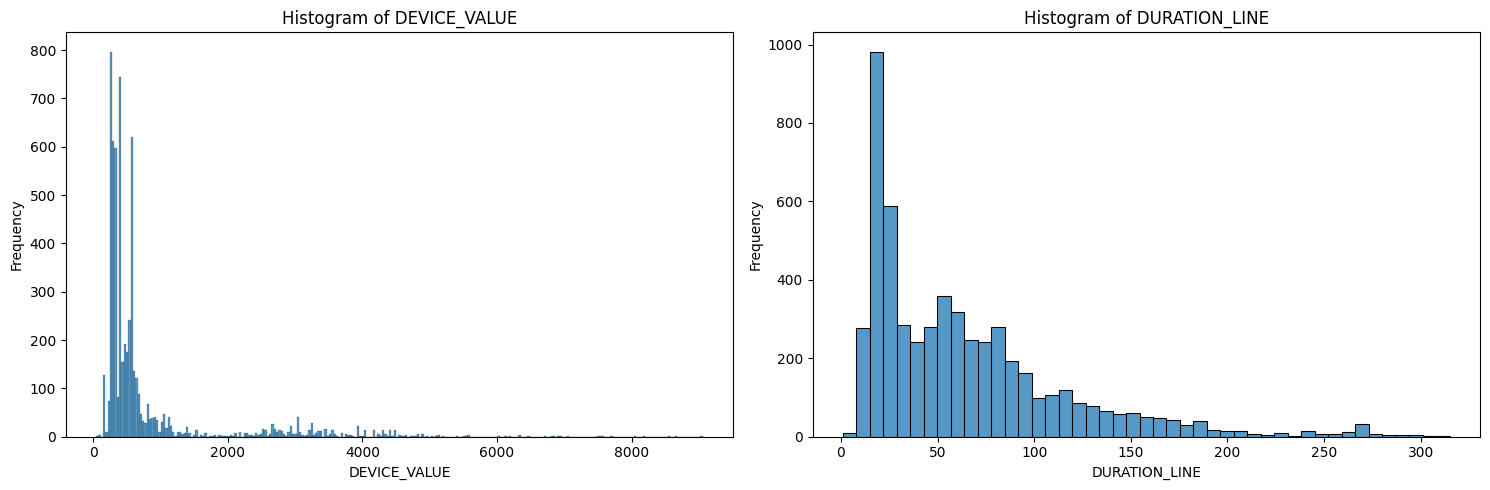

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot histogram for DEVICE_VALUE
sns.histplot(fix_activation['DEVICE_VALUE'], kde=False, ax=axes[0])
axes[0].set(title='Histogram of DEVICE_VALUE', xlabel='DEVICE_VALUE', ylabel='Frequency')

# Plot histogram for DURATION_LINE
sns.histplot(fix_activation['DURATION_LINE'], kde=False, ax=axes[1])
axes[1].set(title='Histogram of DURATION_LINE', xlabel='DURATION_LINE', ylabel='Frequency')

plt.tight_layout()
plt.show()

> Both histograms for DEVICE_VALUE and DURATION_LINE shows a unimodal distribution with its peak being on the leftmost side indicating that the lower the device_value or the duration_line, the higher the frequency is for both. As for their distributions, both exhibit a lognormal distribution having a right-skewed normal distribution.

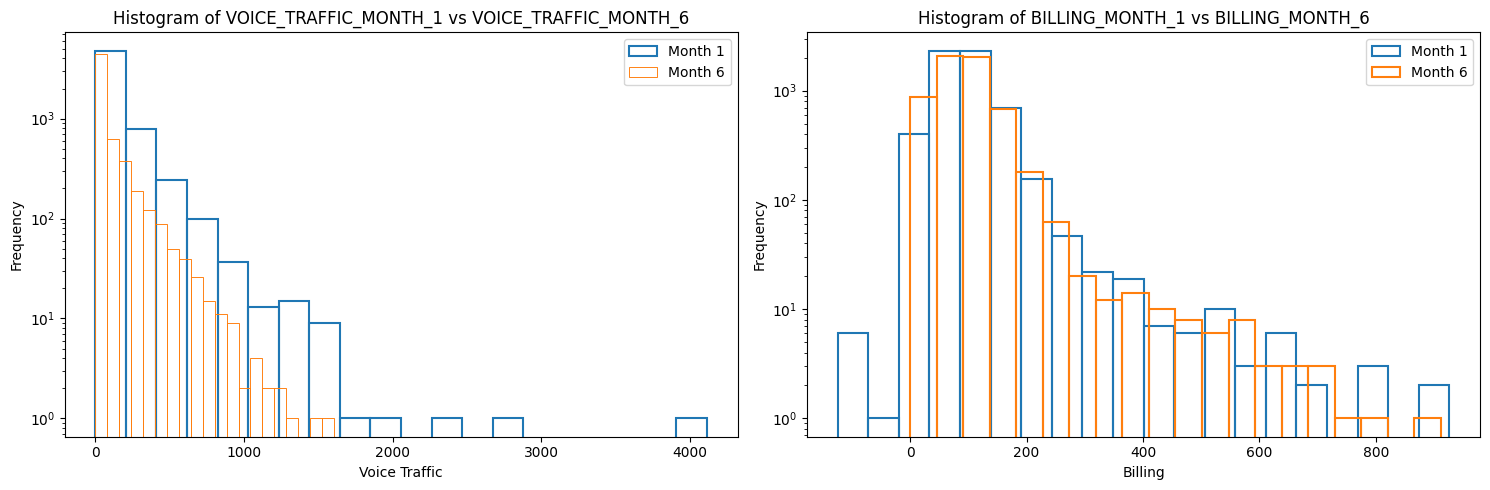

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot histogram for VOICE_TRAFFIC_MONTH_1 and VOICE_TRAFFIC_MONTH_6
sns.histplot(data=fix_activation, x='VOICE_TRAFFIC_MONTH_1', bins=20, fill=False, label='Month 1', ax=axes[0])
sns.histplot(data=fix_activation, x='VOICE_TRAFFIC_MONTH_6', bins=20, fill=False, label='Month 6', ax=axes[0])
axes[0].set(title='Histogram of VOICE_TRAFFIC_MONTH_1 vs VOICE_TRAFFIC_MONTH_6', xlabel='Voice Traffic', ylabel='Frequency')
axes[0].legend()
axes[0].set_yscale('log')

# Plot histogram for BILLING_MONTH_1 and BILLING_MONTH_6
sns.histplot(data=fix_activation, x='BILLING_MONTH_1', bins=20, fill=False, label='Month 1', ax=axes[1])
sns.histplot(data=fix_activation, x='BILLING_MONTH_6', bins=20, fill=False, label='Month 6', ax=axes[1])
axes[1].set(title='Histogram of BILLING_MONTH_1 vs BILLING_MONTH_6', xlabel='Billing', ylabel='Frequency')
axes[1].legend()
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

> After implementing 20 bins, the distribution per graph is much clearer.

**Voice Traffic Month**
- The frequency is at its highest at lower frequencies and quickly gets lower as there is more voice traffic
- There is a same trend going on with Month 1 and Month 6 With both their peak being almost the same value (at lowest frequency)
- However, Month 6 drops frequency faster than Month 1 and there is little to none left on frequencies 1500 and above

**Billing Month**
- For Month 1, there are many frequencies with 0 billing
- Billing peaks at 0 to 200 and slowly drops from thereon
- Month 1 and Month 6 has close values with each other

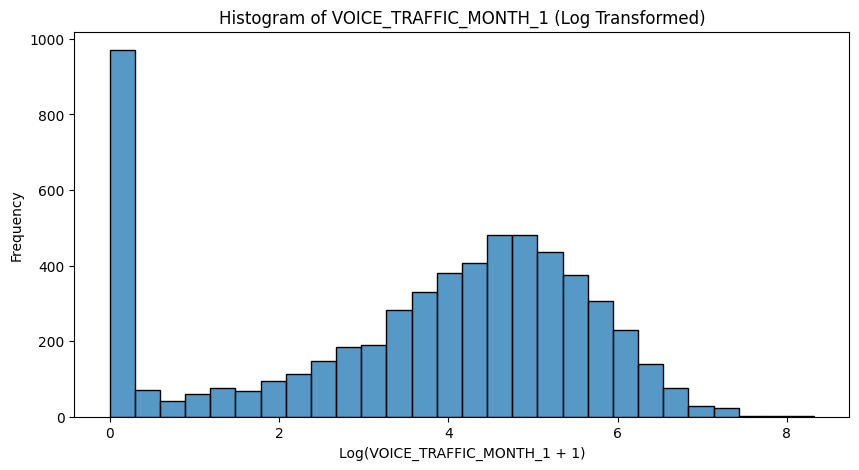

In [19]:
# Apply log(x+1) transformation to VOICE_TRAFFIC_MONTH_1
fix_activation['VOICE_TRAFFIC_MONTH_1_LOG'] = np.log1p(fix_activation['VOICE_TRAFFIC_MONTH_1'])

# Plot the new distribution
plt.figure(figsize=(10, 5))
sns.histplot(fix_activation['VOICE_TRAFFIC_MONTH_1_LOG'], kde=False)
plt.title('Histogram of VOICE_TRAFFIC_MONTH_1 (Log Transformed)')
plt.xlabel('Log(VOICE_TRAFFIC_MONTH_1 + 1)')
plt.ylabel('Frequency')
plt.show()

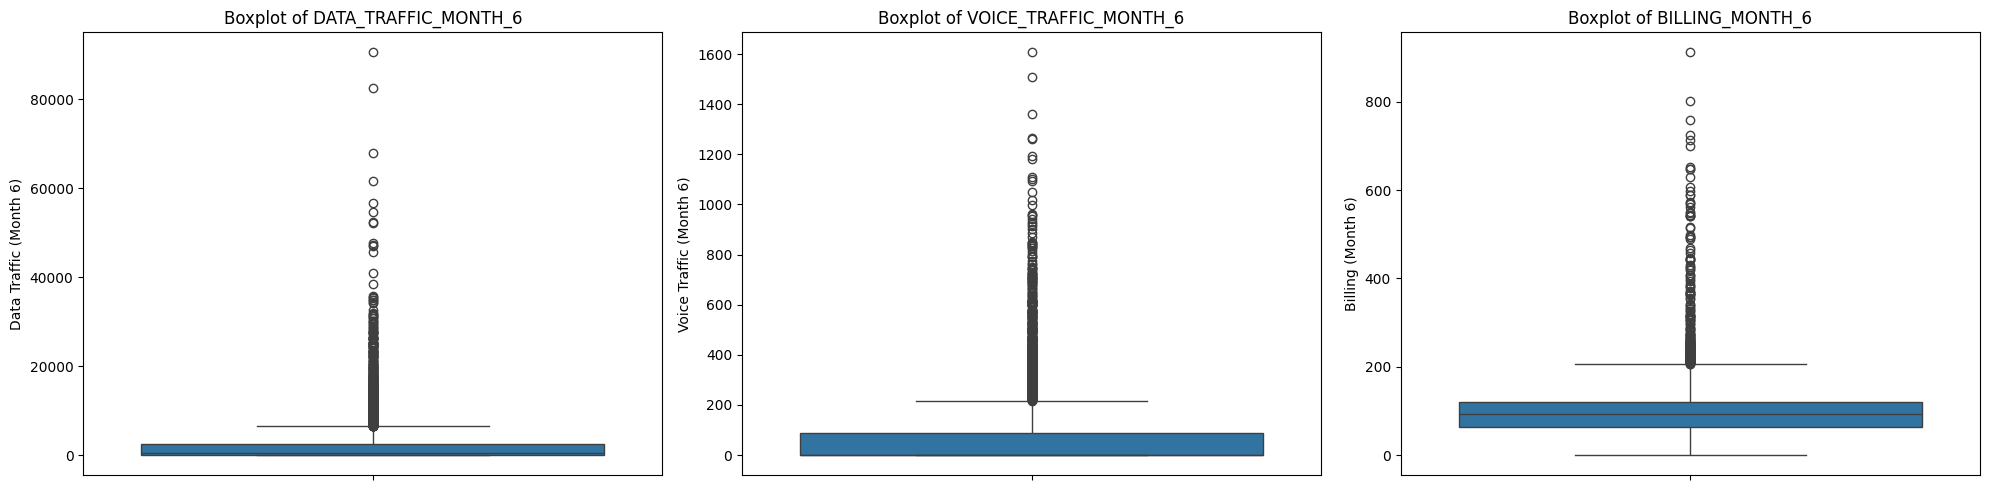

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Boxplot for DATA_TRAFFIC_MONTH_6
sns.boxplot(data=fix_activation, y='DATA_TRAFFIC_MONTH_6', ax=axes[0])
axes[0].set(title='Boxplot of DATA_TRAFFIC_MONTH_6', ylabel='Data Traffic (Month 6)')

# Boxplot for VOICE_TRAFFIC_MONTH_6
sns.boxplot(data=fix_activation, y='VOICE_TRAFFIC_MONTH_6', ax=axes[1])
axes[1].set(title='Boxplot of VOICE_TRAFFIC_MONTH_6', ylabel='Voice Traffic (Month 6)')

# Boxplot for BILLING_MONTH_6
sns.boxplot(data=fix_activation, y='BILLING_MONTH_6', ax=axes[2])
axes[2].set(title='Boxplot of BILLING_MONTH_6', ylabel='Billing (Month 6)')

plt.tight_layout()
plt.show()

> Looking at the boxplots, we can see that there are a lot of outliers above the upper whisker. We can assume that values above this part can be considered extreme values and can be considered as a thershold for outliers.

,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_2,VOICE_TRAFFIC_MONTH_3,VOICE_TRAFFIC_MONTH_4,...,BILLING_MONTH_4,BILLING_MONTH_5,BILLING_MONTH_6,DEVICE_COST_MONTH_1,DEVICE_COST_MONTH_2,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,DEVICE_VALUE
DATA_TRAFFIC_MONTH_1,1.00,0.76,0.73,0.70,0.66,0.62,0.09,0.07,0.07,0.07,...,0.20,0.19,0.19,0.01,0.05,0.08,0.08,0.08,0.08,0.12
DATA_TRAFFIC_MONTH_2,0.76,1.00,0.97,0.79,0.76,0.69,0.08,0.08,0.08,0.07,...,0.19,0.19,0.20,0.01,0.05,0.06,0.07,0.07,0.07,0.11
DATA_TRAFFIC_MONTH_3,0.73,0.97,1.00,0.81,0.77,0.70,0.08,0.08,0.08,0.07,...,0.20,0.19,0.20,0.01,0.05,0.06,0.07,0.07,0.07,0.12
DATA_TRAFFIC_MONTH_4,0.70,0.79,0.81,1.00,0.83,0.72,0.09,0.09,0.09,0.09,...,0.20,0.21,0.22,0.01,0.05,0.07,0.07,0.07,0.07,0.12
DATA_TRAFFIC_MONTH_5,0.66,0.76,0.77,0.83,1.00,0.80,0.09,0.09,0.10,0.09,...,0.22,0.21,0.22,0.01,0.03,0.07,0.06,0.06,0.06,0.13
DATA_TRAFFIC_MONTH_6,0.62,0.69,0.70,0.72,0.80,1.00,0.08,0.08,0.08,0.08,...,0.20,0.19,0.20,0.01,0.05,0.09,0.07,0.07,0.08,0.12
VOICE_TRAFFIC_MONTH_1,0.09,0.08,0.08,0.09,0.09,0.08,1.00,0.82,0.80,0.74,...,0.13,0.13,0.14,-0.01,0.00,0.01,0.00,0.01,0.01,0.02
VOICE_TRAFFIC_MONTH_2,0.07,0.08,0.08,0.09,0.09,0.08,0.82,1.00,0.98,0.83,...,0.11,0.11,0.12,-0.01,0.00,-0.00,0.00,0.00,0.00,0.03
VOICE_TRAFFIC_MONTH_3,0.07,0.08,0.08,0.09,0.10,0.08,0.80,0.98,1.00,0.85,...,0.11,0.11,0.12,-0.01,0.01,-0.00,0.00,0.00,0.01,0.03
VOICE_TRAFFIC_MONTH_4,0.07,0.07,0.07,0.09,0.09,0.08,0.74,0.83,0.85,1.00,...,0.12,0.12,0.12,-0.01,0.01,0.01,-0.00,-0.00,0.01,0.02


<Figure size 2000x2000 with 0 Axes>

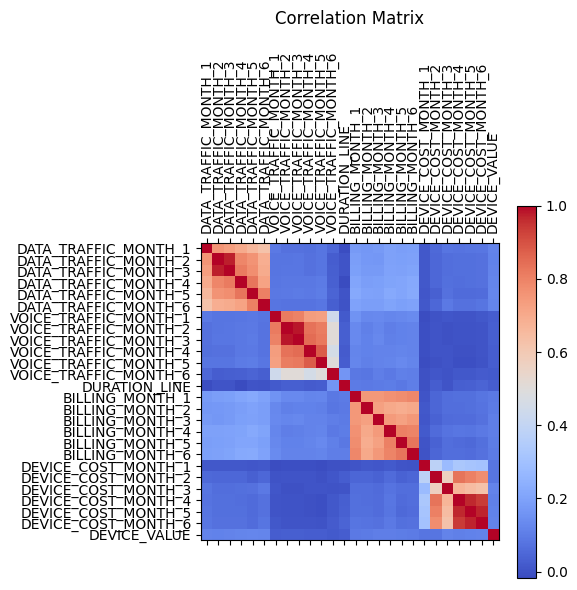

In [21]:
columns_to_correlate = [
    'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
    'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6',
    'DURATION_LINE', 'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6',
    'DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6',
    'DEVICE_VALUE'
]

# Ensure numeric conversion
fix_activation[columns_to_correlate] = fix_activation[columns_to_correlate].apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix
correlation_matrix = fix_activation[columns_to_correlate].corr(method='pearson')

# Display the correlation matrix as a table
display(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(20, 20))
plt.matshow(correlation_matrix, cmap='coolwarm',)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix', pad=20)
plt.show()

- The data are mostly correlated with the same categories as themselves (Data traffic to Data traffic, etc.)
- Billing month is least correlated with data traffic
- Voice traffic is a bit correlated with data traffic
- Device Cost month 1 is not correlated with device cost; however, unlike month 1, device cost month 2 to 6 are  are closely correlated to device cost.

## 2.3. Date management and period calculation

In [22]:
fix_activation['LAST_DEVICE_CHANGE'] = fix_activation['LAST_DEVICE_CHANGE'].fillna(0).astype(int).astype(str)
max_last_device_change = fix_activation['LAST_DEVICE_CHANGE'].max()
latest_change = datetime.datetime.strptime(max_last_device_change, '%Y%m%d')
print(latest_change)
now = latest_change + datetime.timedelta(days=30)
print(now)

2019-05-01 00:00:00
2019-05-31 00:00:00


In [ ]:
fix_activation['LAST_DEVICE_CHANGE'] = pd.to_datetime(fix_activation['LAST_DEVICE_CHANGE'], format='%Y%m%d', errors='coerce')

fix_activation['MONTHS_LAST_DEVICE'] = (now - fix_activation['LAST_DEVICE_CHANGE']) / (30 * datetime.timedelta(days=1))

fix_activation['MONTHS_LAST_DEVICE'] = fix_activation['MONTHS_LAST_DEVICE'].fillna(0).astype(int)

fix_activation.head(5)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND,VOICE_TRAFFIC_MONTH_1_LOG
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaT,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,20041220.00,0,172.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola,3.88
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,2017-04-01,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,20170405.00,26,20.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung,1.55
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaT,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,20040412.00,0,176.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola,3.30
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,2017-10-01,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,20110825.00,20,88.00,iPhone 6,Apple Inc,Apple,5.17
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,2019-01-01,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,20140617.00,5,54.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros,5.95


In [ ]:
fix_activation['LINE_ACTIVATION_DATE'] = pd.to_datetime(fix_activation['LINE_ACTIVATION_DATE'], format='%Y%m%d', errors='coerce')

duration_line_difference = now - fix_activation['LINE_ACTIVATION_DATE']

fix_activation['DURATION_LINE'] = duration_line_difference.dt.days

average_duration_line_days = fix_activation['DURATION_LINE'].mean()

average_duration_line_years = average_duration_line_days / 365

display(fix_activation)

print(f"Average DURATION_LINE: {average_duration_line_years:.2f} years")

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND,VOICE_TRAFFIC_MONTH_1_LOG
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaT,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,2004-12-20,0,5275.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola,3.88
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,2017-04-01,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,2017-04-05,26,786.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung,1.55
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaT,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,2004-04-12,0,5527.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola,3.30
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,2017-10-01,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,2011-08-25,20,2836.00,iPhone 6,Apple Inc,Apple,5.17
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,2019-01-01,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,2014-06-17,5,1809.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros,5.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,NaT,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,597.80,...,0.00,0.00,0.00,2015-06-22,0,1439.00,iPhone 6S,Apple Inc,Apple,6.39
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,2017-04-01,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,247.50,...,0.00,0.00,0.00,2017-04-19,26,772.00,iPhone 7 Plus,Apple Inc,Apple,5.52
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,2018-04-01,1007.77,335.02,335.02,171.91,555.69,425.70,88.50,...,9.00,9.00,9.00,2013-03-26,14,2257.00,Samsung Galaxy J7,Samsung Korea,Samsung,4.49
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,NaT,189.18,155.55,155.55,51.76,62.37,230.53,38.50,...,0.00,0.00,0.00,2011-02-14,0,3028.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola,3.68


Average DURATION_LINE: 5.34 years



## 2.4. Standarization and scaling of numerical variables

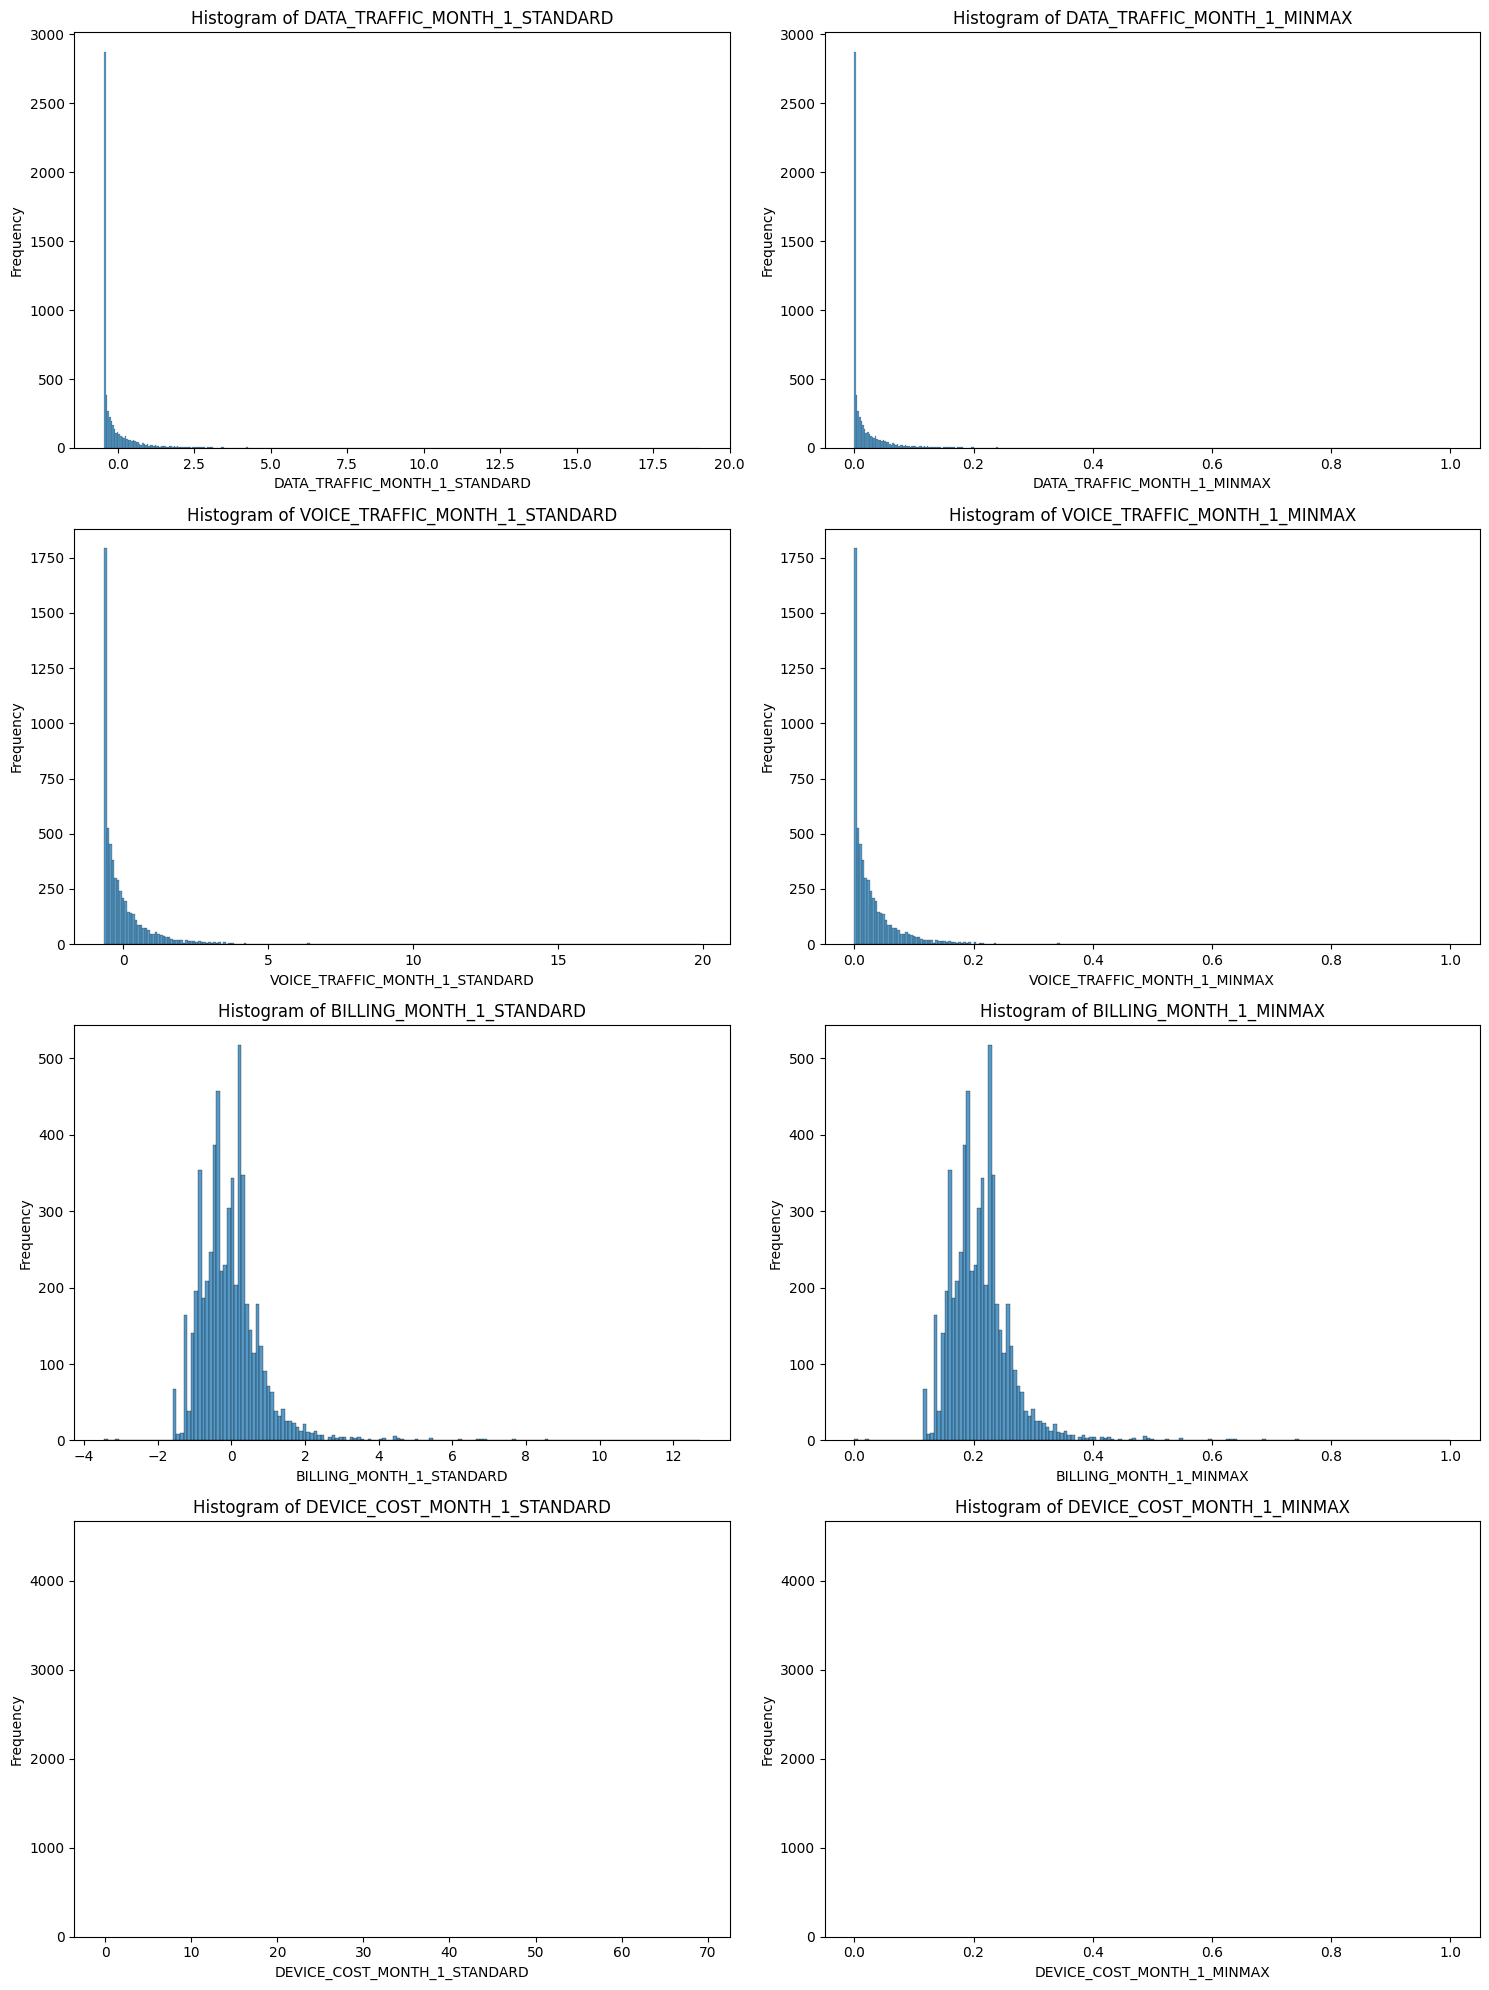

In [ ]:
columns_to_scale = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1', 'DEVICE_COST_MONTH_1']

for column in columns_to_scale:
    # Standardize
    fix_activation[f'{column}_STANDARD'] = StandardScaler().fit_transform(fix_activation[[column]])
    
    # Min-max scale
    fix_activation[f'{column}_MINMAX'] = MinMaxScaler().fit_transform(fix_activation[[column]])

# Plot histograms for each new variable
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

for i, column in enumerate(columns_to_scale):
    sns.histplot(fix_activation[f'{column}_STANDARD'], kde=False, ax=axes[i, 0])
    axes[i, 0].set(title=f'Histogram of {column}_STANDARD', xlabel=f'{column}_STANDARD', ylabel='Frequency')
    sns.histplot(fix_activation[f'{column}_MINMAX'], kde=False, ax=axes[i, 1])
    axes[i, 1].set(title=f'Histogram of {column}_MINMAX', xlabel=f'{column}_MINMAX', ylabel='Frequency')

plt.tight_layout()
plt.show()

## 2.5. Convert categorical columns to dummy binary variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

fix_activation['PREVIOUS_DEVICE_BRAND_INT_ENCODED'] = label_encoder.fit_transform(fix_activation['PREVIOUS_DEVICE_BRAND'])

fix_activation[['PREVIOUS_DEVICE_BRAND', 'PREVIOUS_DEVICE_BRAND_INT_ENCODED']].head()

,PREVIOUS_DEVICE_BRAND,PREVIOUS_DEVICE_BRAND_INT_ENCODED
0,Motorola,2
1,Samsung,4
2,Motorola,2
3,Apple,0
4,Outros,3


In [ ]:
previous_device_manuf_dummies = pd.get_dummies(fix_activation['PREVIOUS_DEVICE_MANUF'], prefix='PREVIOUS_DEVICE_MANUF')
fix_activation = fix_activation.join(previous_device_manuf_dummies)

fix_activation.head()

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,PREVIOUS_DEVICE_MANUF_Telit Communications SpA,PREVIOUS_DEVICE_MANUF_Topmax Glory Limited,PREVIOUS_DEVICE_MANUF_Umi Network Technology Co Limited,PREVIOUS_DEVICE_MANUF_United Mobile,PREVIOUS_DEVICE_MANUF_United Time Hong Kong Ltd,PREVIOUS_DEVICE_MANUF_Vikin Communication Technology Co Limited,PREVIOUS_DEVICE_MANUF_Vogtec (H.K) Co Ltd,PREVIOUS_DEVICE_MANUF_Xiaomi Communications Co Ltd,PREVIOUS_DEVICE_MANUF_ZTE Corporation,PREVIOUS_DEVICE_MANUF_u-blox AG
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaT,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,False,False,False,False,False,False,False,False,False,False
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,2017-04-01,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,False,False,False,False,False,False,False,False,False,False
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaT,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,False,False,False,False,False,False,False,False,False,False
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,2017-10-01,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,False,False,False,False,False,False,False,False,False,False
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,2019-01-01,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,False,False,False,False,False,False,False,False,False,False


## 2.6. Feature generation

In [ ]:
columns_to_aggregate = {
    'DATA_TRAFFIC': ['DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6'],
    'VOICE_TRAFFIC': ['VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6'],
    'BILLING': ['BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6'],
    'DEVICE_COST': ['DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6']
}

for key, columns in columns_to_aggregate.items():
    fix_activation[f'{key}_MEAN'] = fix_activation[columns].mean(axis=1)
    fix_activation[f'{key}_MAX'] = fix_activation[columns].max(axis=1)
    fix_activation[f'{key}_MIN'] = fix_activation[columns].min(axis=1)
    fix_activation[f'{key}_RANGE'] = fix_activation[f'{key}_MAX'] - fix_activation[f'{key}_MIN']

fix_activation.head()

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,VOICE_TRAFFIC_MIN,VOICE_TRAFFIC_RANGE,BILLING_MEAN,BILLING_MAX,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaT,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,21.80,57.90,92.96,107.93,85.00,22.93,12.00,12.00,12.00,0.00
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,2017-04-01,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.50,4.40,49.44,56.56,47.00,9.56,0.00,0.00,0.00,0.00
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaT,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,26.10,192.60,121.78,129.14,113.77,15.37,0.00,0.00,0.00,0.00
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,2017-10-01,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,119.00,112.20,58.22,60.93,55.99,4.94,6.00,6.00,6.00,0.00
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,2019-01-01,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,383.90,109.70,110.69,107.99,2.70,0.00,0.00,0.00,0.00


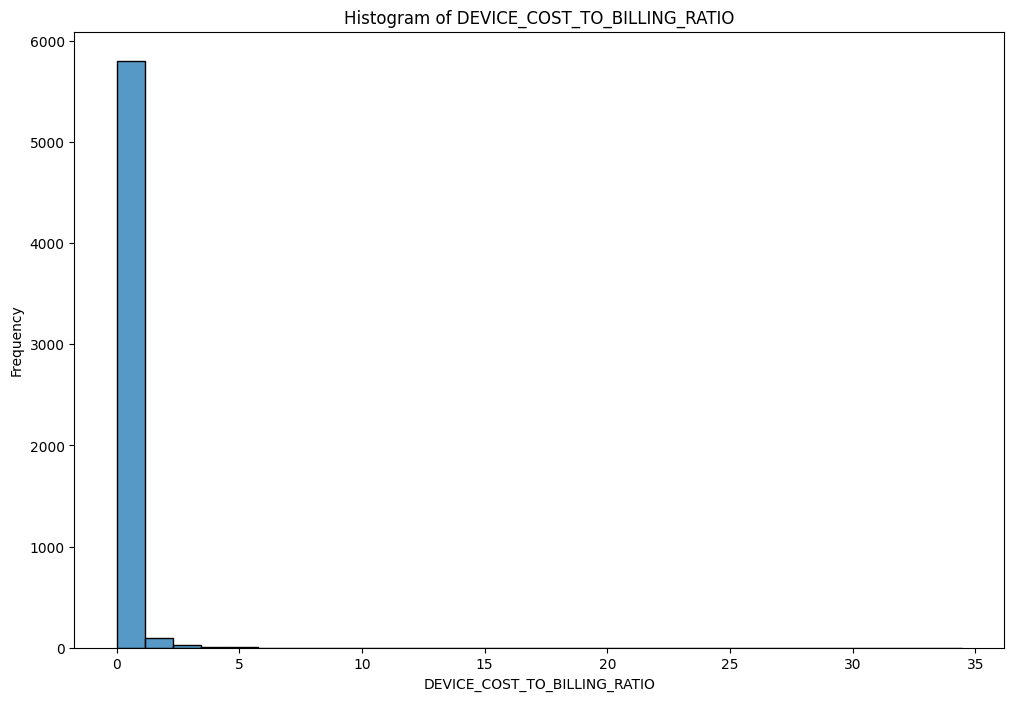

In [29]:
fix_activation['DEVICE_COST_TO_BILLING_RATIO'] = fix_activation['DEVICE_COST_MEAN'] / fix_activation['BILLING_MEAN']
plt.figure(figsize=(12, 8))
ax = sns.histplot(fix_activation['DEVICE_COST_TO_BILLING_RATIO'], bins=30, kde=False)
ax.set(title='Histogram of DEVICE_COST_TO_BILLING_RATIO', xlabel='DEVICE_COST_TO_BILLING_RATIO', ylabel='Frequency')
plt.show()

> The frequency peaks at the lowest device cost to billing ratio and quickly decreases the higher the cost to billing ratio is

## 2.7. Text parsing/processing

In [ ]:
device_components = fix_activation['PURCHASED_DEVICE'].str.split('_', n=1, expand=True)

fix_activation['PURCHASED_DEVICE_CODE'] = device_components[0]
remaining_parts = device_components[1].str.split(' ', n=1, expand=True)

fix_activation['PURCHASED_DEVICE_MANUFACTURER'] = remaining_parts[0]
fix_activation['PURCHASED_DEVICE_MODEL'] = remaining_parts[1]

fix_activation.head()

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaT,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,85.00,22.93,12.00,12.00,12.00,0.00,0.13,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,2017-04-01,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,47.00,9.56,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaT,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,113.77,15.37,0.00,0.00,0.00,0.00,0.00,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,2017-10-01,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,55.99,4.94,6.00,6.00,6.00,0.00,0.10,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,2019-01-01,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,107.99,2.70,0.00,0.00,0.00,0.00,0.00,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO


In [ ]:
purchased_device_manufacturer_census = fix_activation['PURCHASED_DEVICE_MANUFACTURER'].value_counts().reset_index()
purchased_device_manufacturer_census.columns = ['PURCHASED_DEVICE_MANUFACTURER', 'Frequency']
display(purchased_device_manufacturer_census)

previous_device_manuf_census = fix_activation['PREVIOUS_DEVICE_MANUF'].value_counts().reset_index()
previous_device_manuf_census.columns = ['PREVIOUS_DEVICE_MANUF', 'Frequency']
display(previous_device_manuf_census)

,PURCHASED_DEVICE_MANUFACTURER,Frequency
0,LG X210BMW SMARTPHONE PRETO PPB/P1769/07,3273
1,LG X410BCW SMARTPHONE PRETO PPB/P1769/07,266
2,ALCATEL 5033J SMART PRETO,194
3,SAMSUNG J410G SMART PRETO PPB/PI107/04,151
4,SAMSUNG J610G SMART PRETO PPB/PI107/04,128
...,...,...
80,ALCATEL 5199I SMART PRETO PPB/PI324/15,1
81,SAMSUNG G973F SMART BRANCO PPB/PI324/14,1
82,MOTOROLA XT1941 SMARTPHONE BRANCO,1
83,SAMSUNG J610G SMART PRATA PPB/PI324/14,1


,PREVIOUS_DEVICE_MANUF,Frequency
0,Samsung Korea,1879
1,Apple Inc,1495
2,"Motorola Mobility LLC, a Lenovo Company",849
3,LG Electronics Inc.,506
4,TCL Communication Ltd,279
...,...,...
62,Lanxun Technology (Hong Kong) Limited,1
63,Beijing Flyscale Technologies Company Limited,1
64,Meizu Technology Co Ltd,1
65,TP-Link Technologies Co Ltd,1


## 2.8. Splitting and sampling a dataset

In [ ]:
train_dataset, test_dataset = train_test_split(fix_activation, test_size=0.3, random_state=42)

print(f"Training dataset shape: {train_dataset.shape}")
print(f"Testing dataset shape: {test_dataset.shape}")

Training dataset shape: (4191, 130)
Testing dataset shape: (1797, 130)


In [ ]:
train_stats = train_dataset[['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']].describe()
print("Training Dataset Statistics:")
print(train_stats)

test_stats = test_dataset[['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']].describe()
print("\nTesting Dataset Statistics:")
print(test_stats)

Training Dataset Statistics:
       DATA_TRAFFIC_MONTH_1  VOICE_TRAFFIC_MONTH_1  BILLING_MONTH_1
count               4191.00                4191.00          4191.00
mean                2549.41                 132.02           100.03
std                 5612.93                 203.67            65.03
min                    0.00                   0.00          -124.49
25%                    0.00                  10.20            63.36
50%                  399.50                  64.20            92.99
75%                 2842.26                 171.55           121.14
max               112421.17                4113.00           911.72

Testing Dataset Statistics:
       DATA_TRAFFIC_MONTH_1  VOICE_TRAFFIC_MONTH_1  BILLING_MONTH_1
count               1797.00                1797.00          1797.00
mean                2567.66                 127.12            98.42
std                 6135.75                 191.84            64.83
min                    0.00                   0.00        

> The train and test statistics do not match 1:1, but have very close values with each other in comparison.

# 3. Comparing iPhone and Samsung J series users

In [ ]:
# Create a dataframe for Apple iPhone users
iphone_users = fix_activation[fix_activation['PREVIOUS_DEVICE_MODEL'].str.contains('iPhone', na=False)]

# Create a dataframe for Samsung J series users
samsung_j_series_users = fix_activation[fix_activation['PREVIOUS_DEVICE_MODEL'].str.contains('Samsung Galaxy J', na=False)]

display(iphone_users.head())
display(samsung_j_series_users.head())

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,2017-10-01,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,55.99,4.94,6.00,6.00,6.00,0.00,0.10,TGLG29162000,LG X210BMW SMARTPHONE PRETO PPB/P1769/07,None
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.00,2017-01-01,1520.21,2196.57,2196.57,1815.70,2101.68,3224.28,206.90,...,115.00,71.31,13.00,13.00,13.00,0.00,0.09,DGAP068C2000,APPLE IPHONE 8 256GB CINZA PPB/PI643/10,None
8,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,415.00,2018-11-01,10789.82,10423.67,10423.67,5188.60,7379.40,6789.48,64.30,...,109.99,39.99,0.00,0.00,0.00,0.00,0.00,TGMO35912000,MOTOROLA XT1922 SMARTPHONE INDIGO,None
18,DGAP067C2000_APPLE IPHONE 8 64GB CINZA PPB/PI6...,3081.00,2017-09-01,990.28,1011.10,1011.10,1025.97,2778.35,1822.95,102.90,...,60.99,2.96,124.00,124.00,124.00,0.00,1.98,DGAP067C2000,APPLE IPHONE 8 64GB CINZA PPB/PI643/10,None
19,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,2017-10-01,109.83,25.12,25.12,25.36,17.54,19.92,64.90,...,68.69,19.21,125.00,125.00,125.00,0.00,1.58,TGLG29162000,LG X210BMW SMARTPHONE PRETO PPB/P1769/07,None


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,2017-04-01,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,47.00,9.56,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG X210BMW SMARTPHONE PRETO PPB/P1769/07,None
9,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,2014-11-01,793.16,734.52,734.52,156.38,467.95,721.30,2.70,...,50.99,1.01,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG X210BMW SMARTPHONE PRETO PPB/P1769/07,None
11,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,321.00,2017-06-01,4.18,4.18,1.89,8.76,0.00,0.00,12.30,...,103.10,0.04,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG X210BMW SMARTPHONE PRETO PPB/P1769/07,None
23,TGSA32564007_SAMSUNG J260M SMART PRETO PPB/PI...,633.00,2016-08-01,4.53,464.09,695.10,223.33,223.33,247.85,298.00,...,45.59,24.30,2.50,15.00,0.00,15.00,0.04,TGSA32564007,SAMSUNG J260M SMART PRETO,PPB/PI324/14
27,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,2017-07-01,3901.06,2646.63,2646.63,1239.50,1124.44,662.11,66.40,...,40.99,4.23,23.00,23.00,23.00,0.00,0.55,TGLG29162000,LG X210BMW SMARTPHONE PRETO PPB/P1769/07,None


<font size="+1" color="red">Replace this cell with code to compare some variables between the two datasets. Consider 2 or 3 variables, plot together the histograms of each variable in both datasets (including a legend).</font>

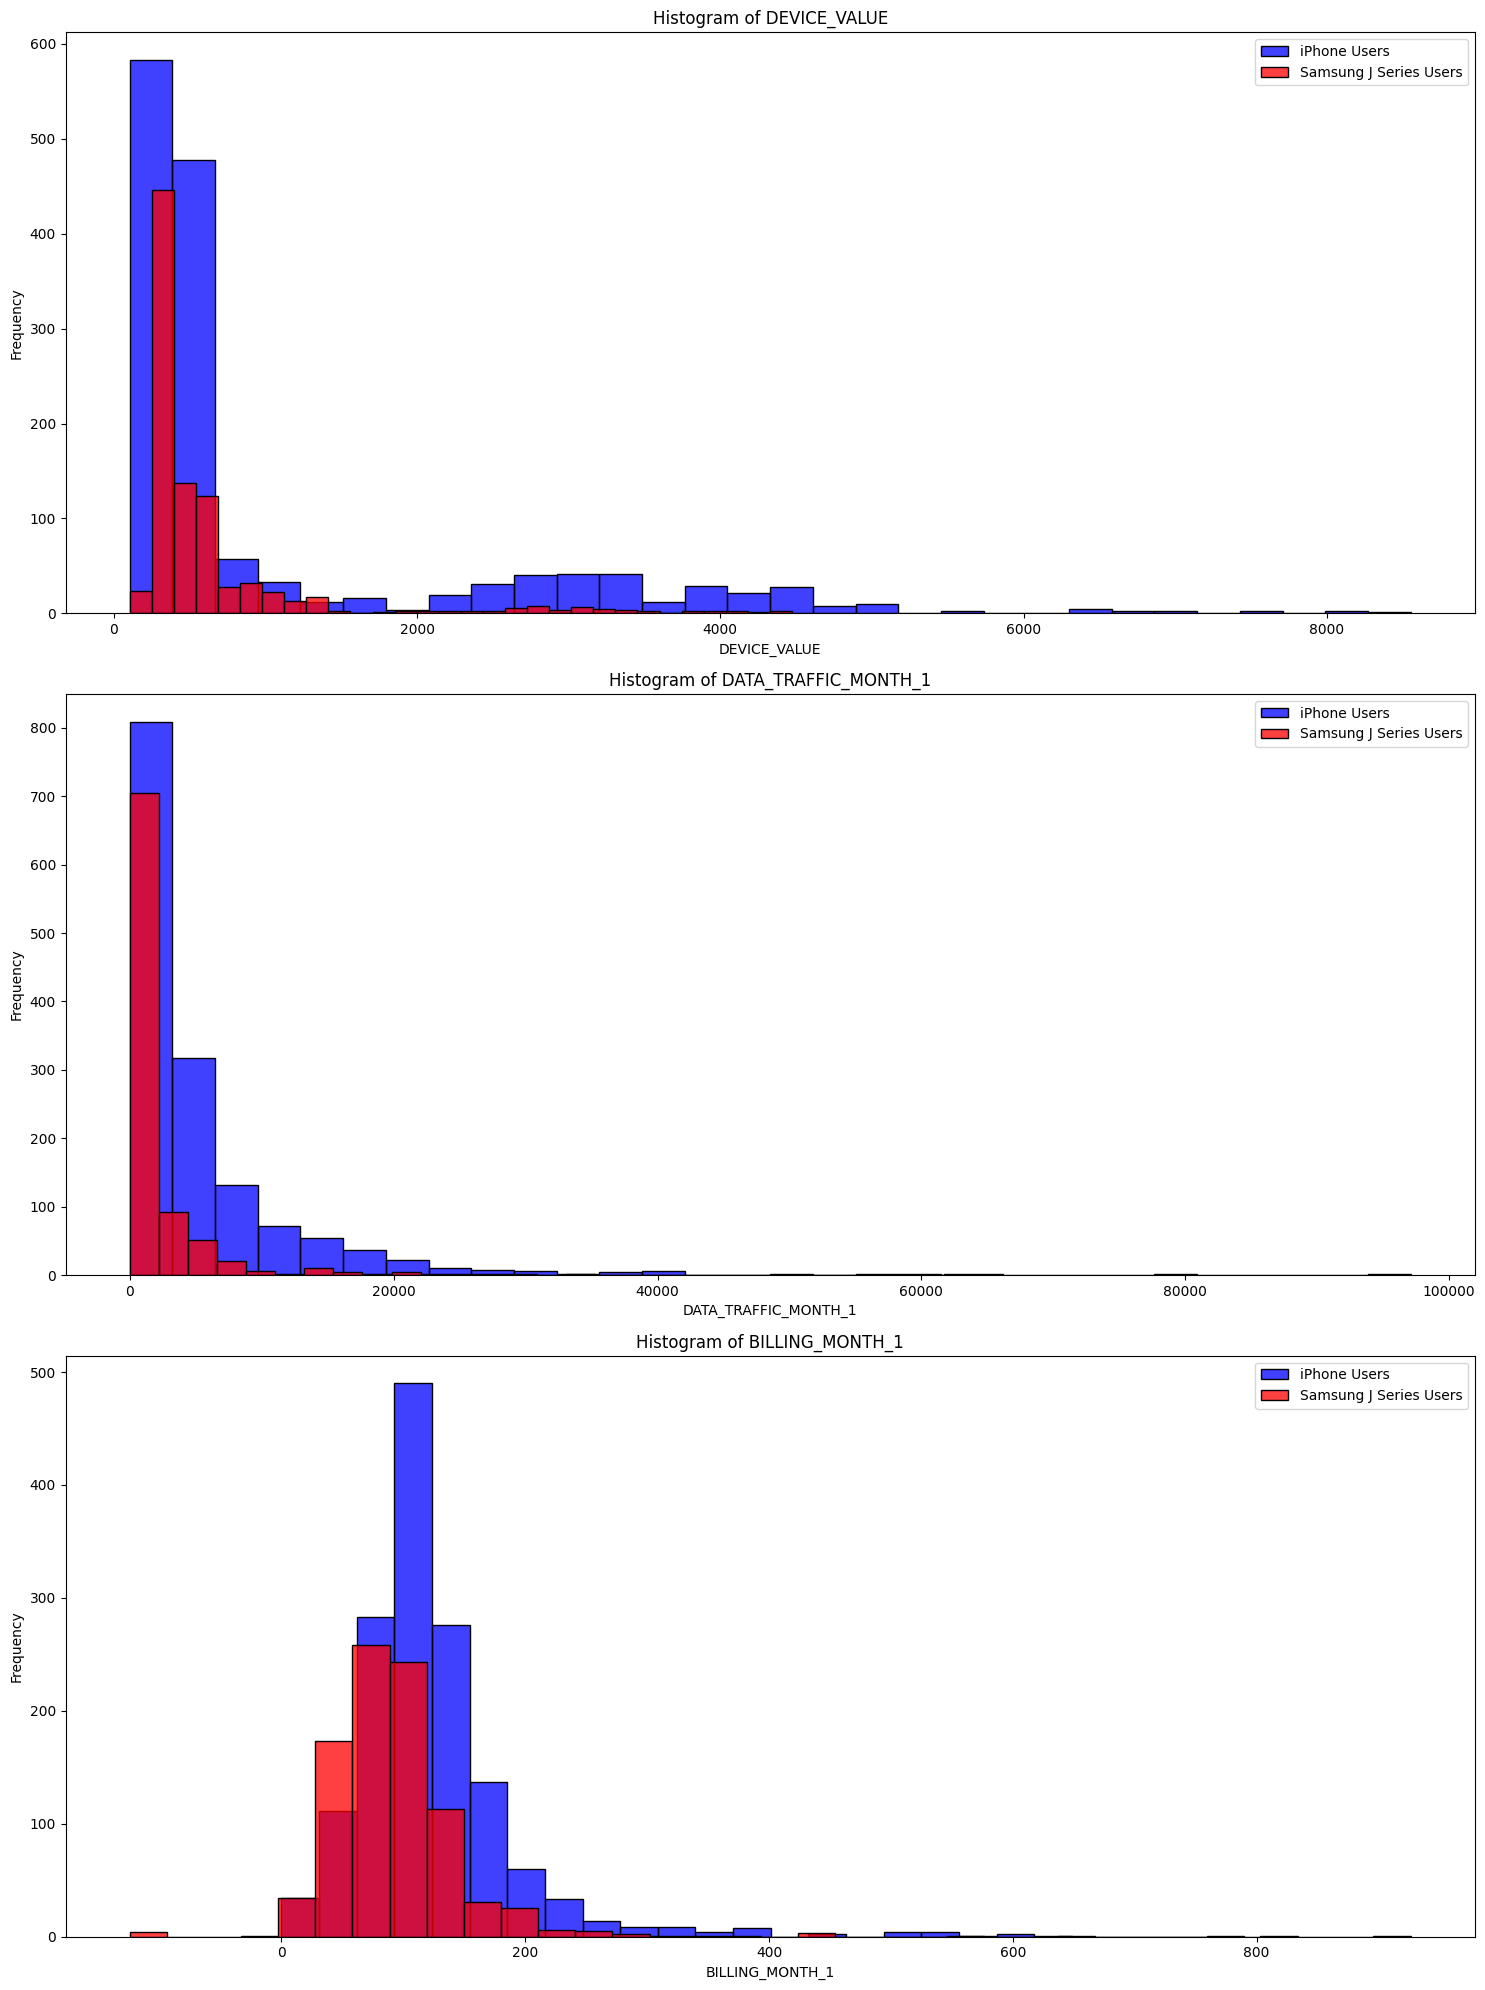

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

sns.histplot(iphone_users['DEVICE_VALUE'], bins=30, kde=False, color='blue', label='iPhone Users', ax=axes[0])
sns.histplot(samsung_j_series_users['DEVICE_VALUE'], bins=30, kde=False, color='red', label='Samsung J Series Users', ax=axes[0])
axes[0].set(title='Histogram of DEVICE_VALUE', xlabel='DEVICE_VALUE', ylabel='Frequency')
axes[0].legend()

sns.histplot(iphone_users['DATA_TRAFFIC_MONTH_1'], bins=30, kde=False, color='blue', label='iPhone Users', ax=axes[1])
sns.histplot(samsung_j_series_users['DATA_TRAFFIC_MONTH_1'], bins=30, kde=False, color='red', label='Samsung J Series Users', ax=axes[1])
axes[1].set(title='Histogram of DATA_TRAFFIC_MONTH_1', xlabel='DATA_TRAFFIC_MONTH_1', ylabel='Frequency')
axes[1].legend()

sns.histplot(iphone_users['BILLING_MONTH_1'], bins=30, kde=False, color='blue', label='iPhone Users', ax=axes[2])
sns.histplot(samsung_j_series_users['BILLING_MONTH_1'], bins=30, kde=False, color='red', label='Samsung J Series Users', ax=axes[2])
axes[2].set(title='Histogram of BILLING_MONTH_1', xlabel='BILLING_MONTH_1', ylabel='Frequency')
axes[2].legend()

plt.tight_layout()
plt.show()

> Data Traffic and Device value have histograms closely related with each other with both of them peaking rightmost. However, both of their frequencies quickly fell fast after growing values. Billing month also peaks at the lowest billing month value with iPhone users having more frequencies as compared to Samsung users.

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the data
input_data = fix_activation.copy()

# Encode categorical variables
label_encoder_model = LabelEncoder()
label_encoder_brand = LabelEncoder()
label_encoder_manufacturer = LabelEncoder()

input_data['PREVIOUS_DEVICE_MODEL_ENCODED'] = label_encoder_model.fit_transform(input_data['PREVIOUS_DEVICE_MODEL'])
input_data['PREVIOUS_DEVICE_BRAND_ENCODED'] = label_encoder_brand.fit_transform(input_data['PREVIOUS_DEVICE_BRAND'])
input_data['PURCHASED_DEVICE_MANUFACTURER_ENCODED'] = label_encoder_manufacturer.fit_transform(input_data['PURCHASED_DEVICE_MANUFACTURER'])

# Drop rows with NaN values in the required columns
input_data = input_data.dropna(subset=['PREVIOUS_DEVICE_MODEL_ENCODED', 'PREVIOUS_DEVICE_BRAND_ENCODED', 'MONTHS_LAST_DEVICE', 'PURCHASED_DEVICE_MANUFACTURER_ENCODED'])

# Split the data into training and testing sets
X = input_data[['PREVIOUS_DEVICE_MODEL_ENCODED', 'PREVIOUS_DEVICE_BRAND_ENCODED', 'MONTHS_LAST_DEVICE']]
y = input_data['PURCHASED_DEVICE_MANUFACTURER_ENCODED']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree model
model_3_vars = DecisionTreeClassifier(random_state=42)
model_3_vars.fit(X_train, y_train)

# Predict and measure accuracy
y_pred_3_vars = model_3_vars.predict(X_test)
accuracy_3_vars = accuracy_score(y_test, y_pred_3_vars)
print(f"Accuracy of 3-variables model: {accuracy_3_vars:.2f}")

# Add two more variables: DEVICE_VALUE and DURATION_LINE
X = input_data[['PREVIOUS_DEVICE_MODEL_ENCODED', 'PREVIOUS_DEVICE_BRAND_ENCODED', 'MONTHS_LAST_DEVICE', 'DEVICE_VALUE', 'DURATION_LINE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree model with 5 variables
model_5_vars = DecisionTreeClassifier(random_state=42)
model_5_vars.fit(X_train, y_train)

# Predict and measure accuracy
y_pred_5_vars = model_5_vars.predict(X_test)
accuracy_5_vars = accuracy_score(y_test, y_pred_5_vars)
print(f"Accuracy of 5-variables model: {accuracy_5_vars:.2f}")

Accuracy of 3-variables model: 0.50
Accuracy of 5-variables model: 0.84


<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>

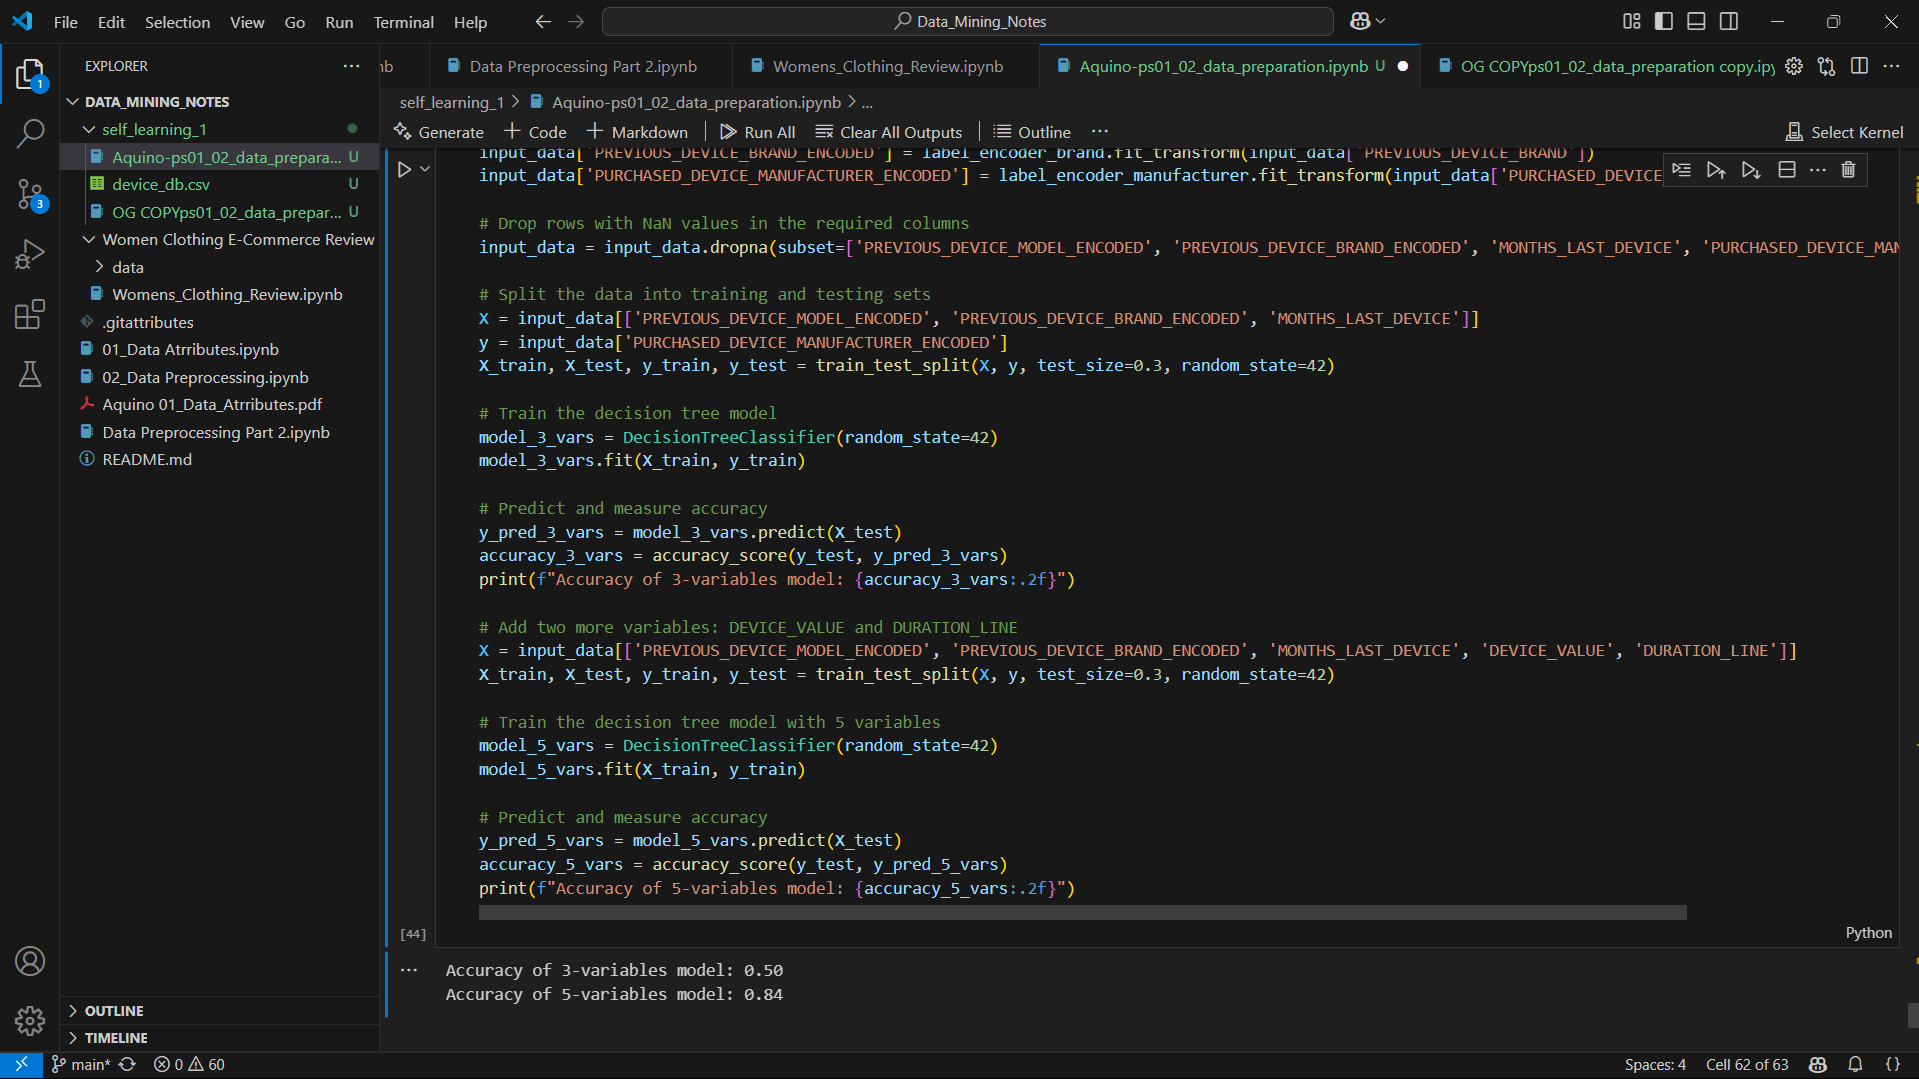